In [1]:
from base import *

# Number of Nodes in Each Hidden Layer

## NN

> Testing with 24 nodes

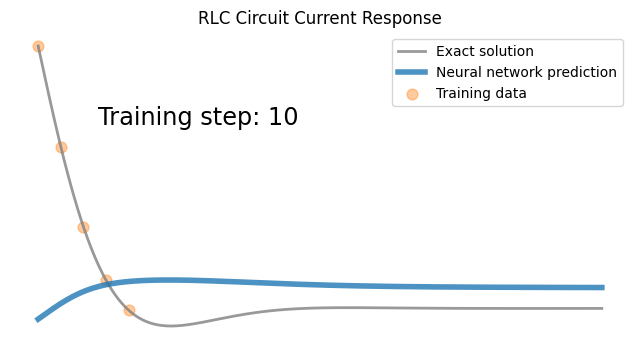

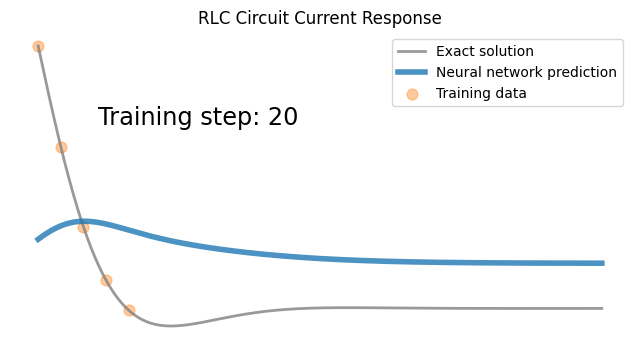

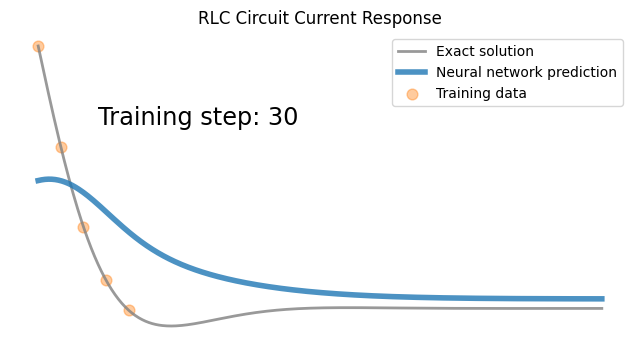

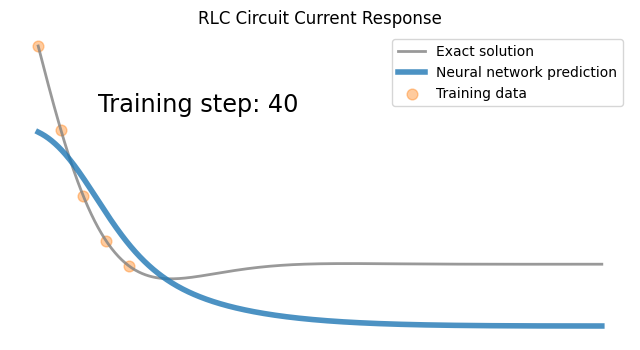

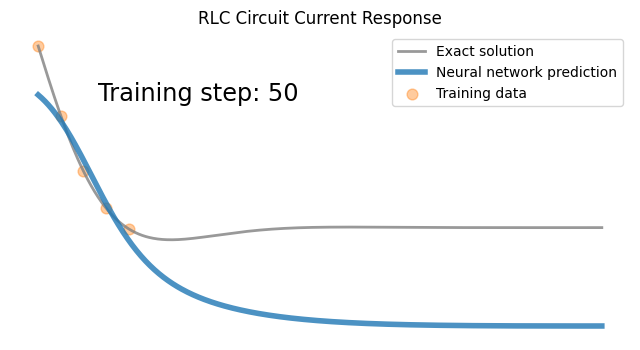

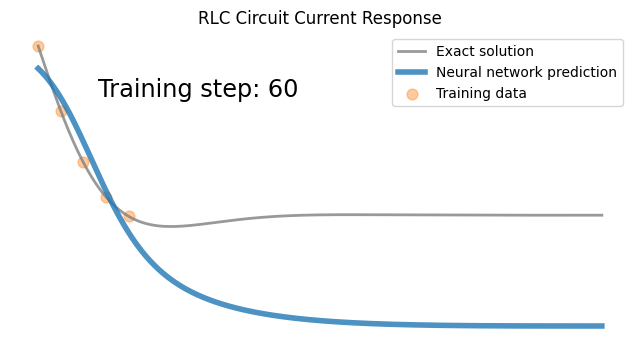

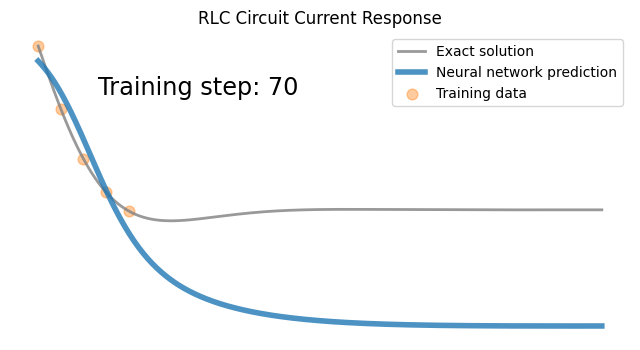

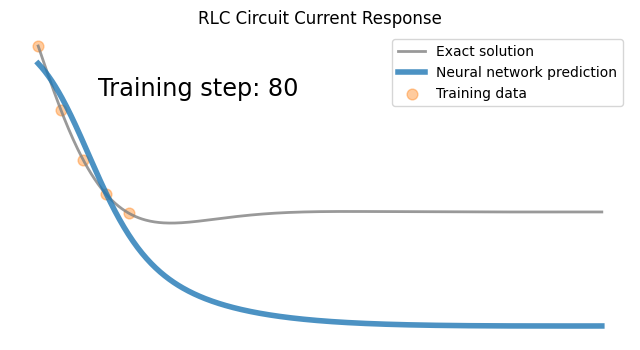

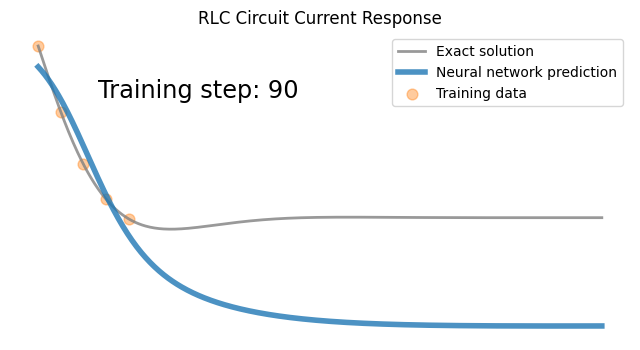

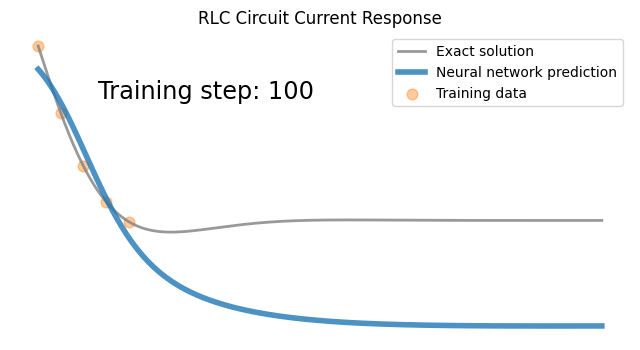

In [2]:
torch.manual_seed(123)

# Testing with 24
model = FCN(1, 1, 24, 3)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

for i in range(100):
    optimizer.zero_grad()
    Ih = model(t_data)
    loss = loss_fn(Ih, I_data)  
    loss.backward()
    optimizer.step()
    
    if (i + 1) % 10 == 0: 
        Ih_full = model(t).detach()  
        plot_result(t, I, t_data, I_data, Ih_full, i+1)
        plt.show()

> Testing with 40 nodes

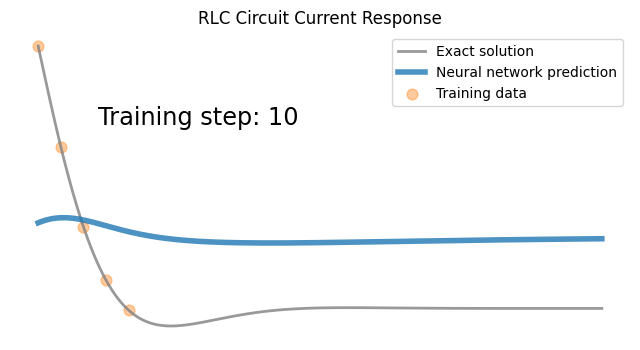

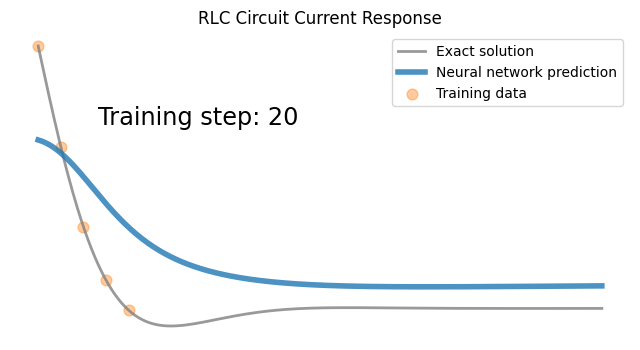

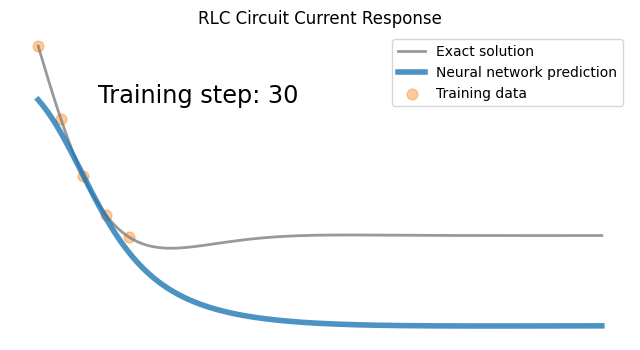

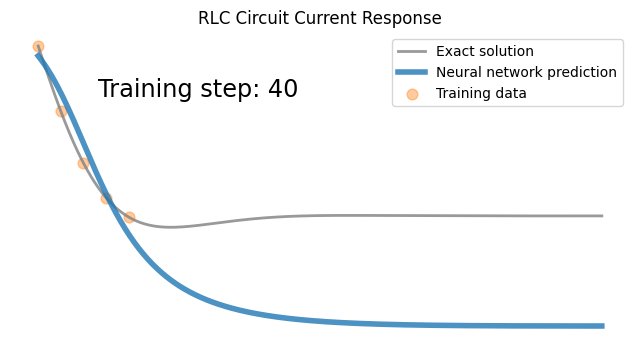

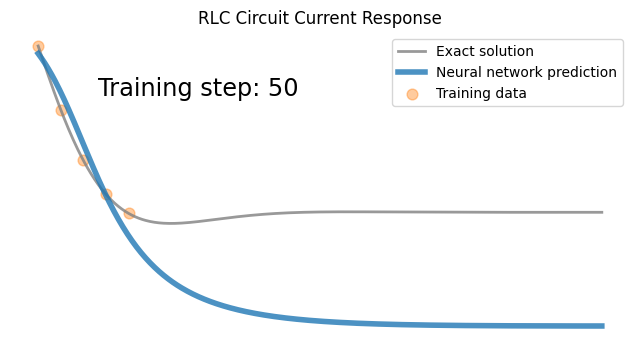

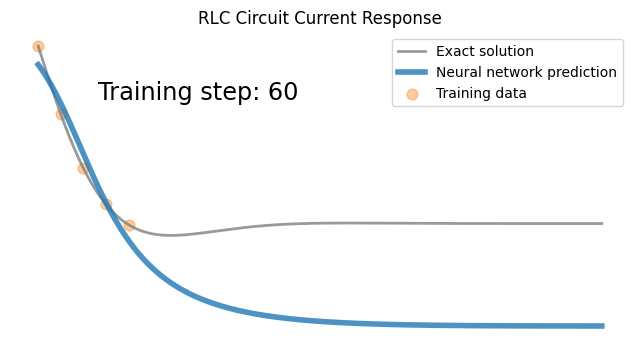

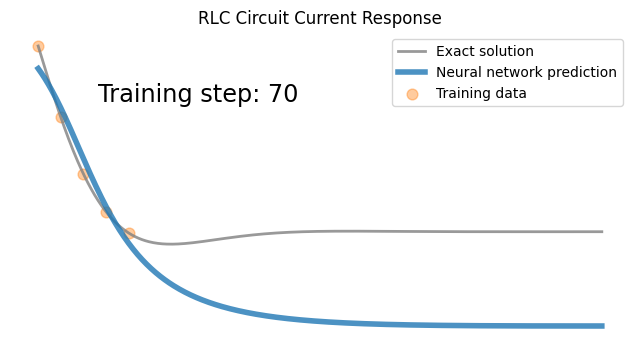

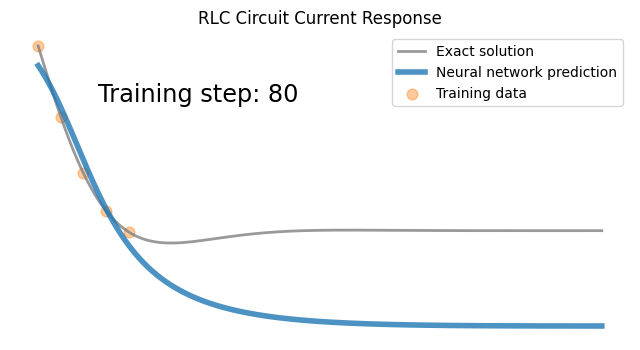

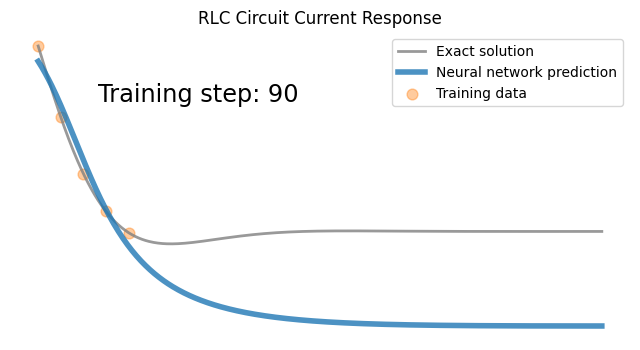

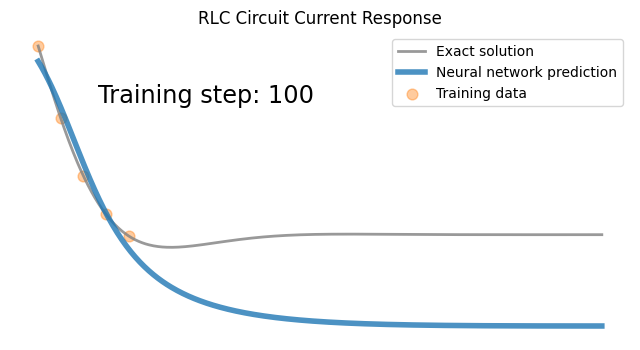

In [3]:
torch.manual_seed(123)

# Testing with 40
model = FCN(1, 1, 40, 3)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

for i in range(100):
    optimizer.zero_grad()
    Ih = model(t_data)
    loss = loss_fn(Ih, I_data)  
    loss.backward()
    optimizer.step()
    
    if (i + 1) % 10 == 0: 
        Ih_full = model(t).detach()  
        plot_result(t, I, t_data, I_data, Ih_full, i+1)
        plt.show()

### Inference

- Some variation is observed on both increasing/decreasing number of hidden layers in the starting, however it soons converges to similar graph after 50 training step.
- Very minor/negligibe difference in Generalization, Accuracy, Convergence

## PINN

> Testing with 24 nodes

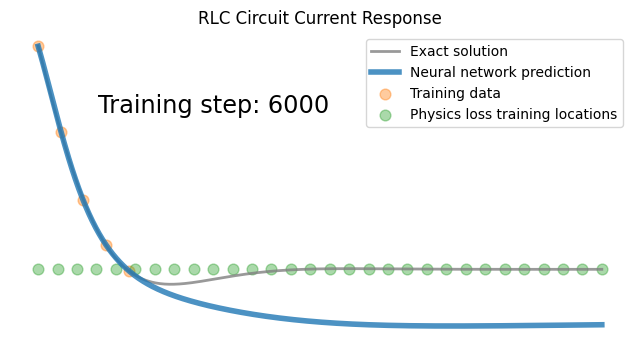

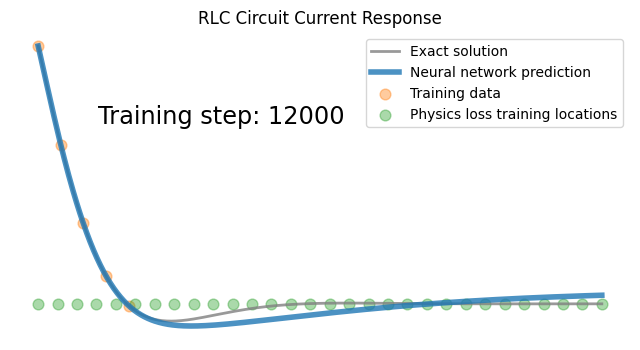

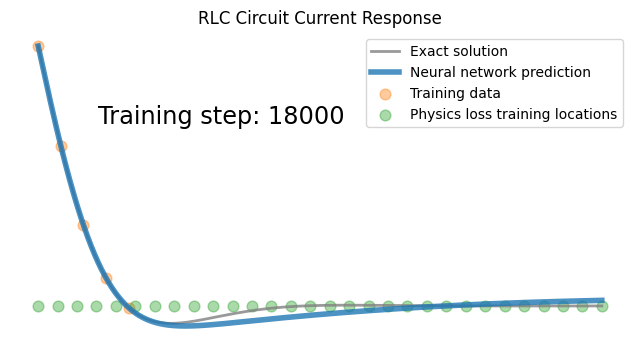

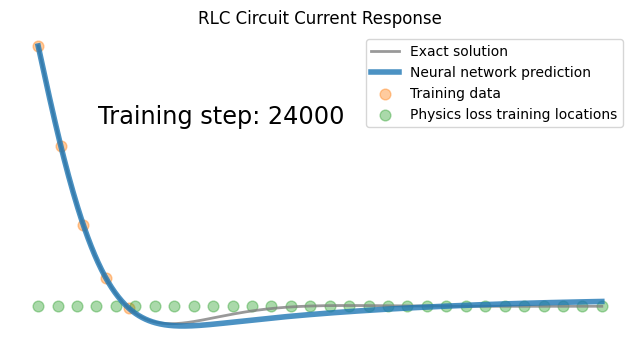

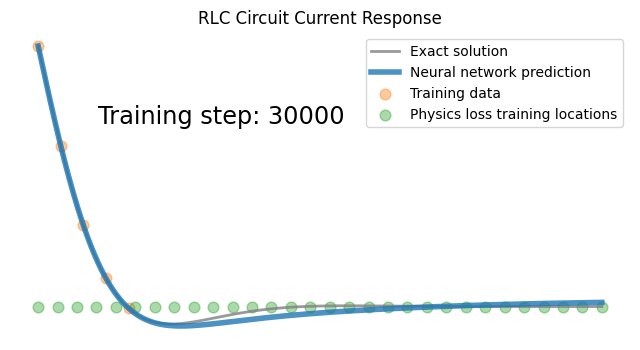

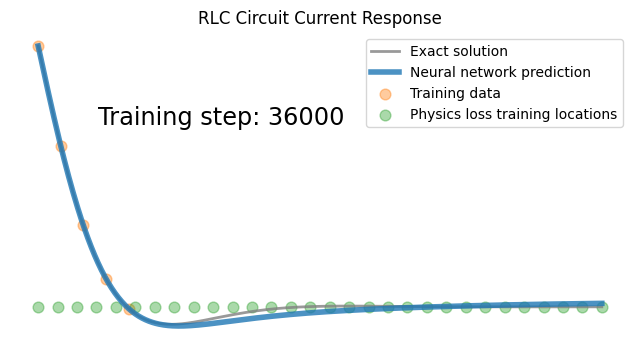

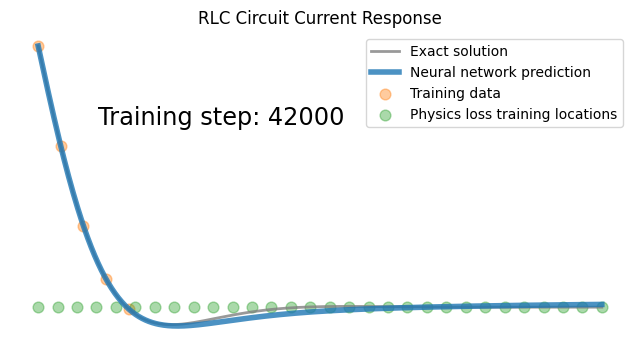

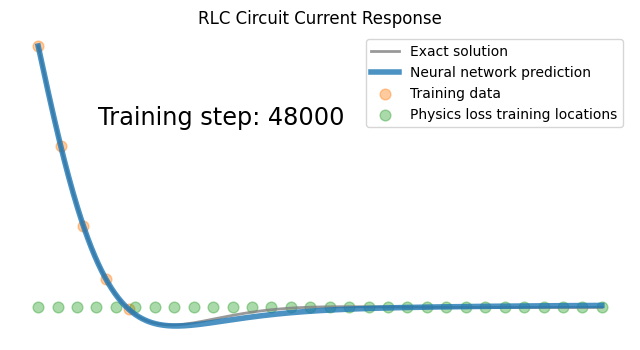

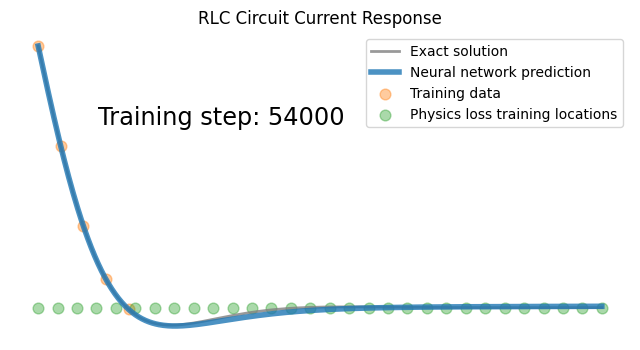

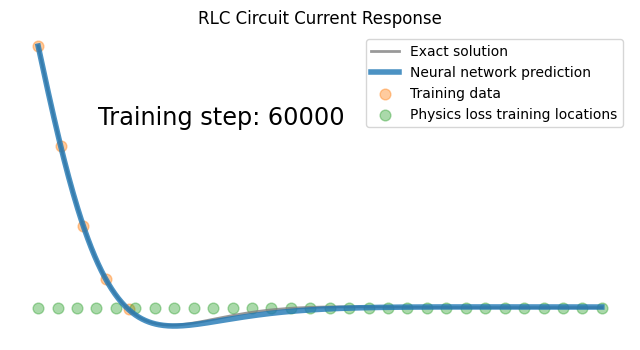

In [4]:
t_physics = torch.linspace(0, 10, 30).view(-1,1).requires_grad_(True) 

torch.manual_seed(123)
# Testing with 24
model = FCN(1, 1, 24, 3)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

for i in range(60000):
    optimizer.zero_grad()
    
    Ih = model(t_data) 
    loss1 = loss_fn(Ih, I_data)  
    
    Ihp = model(t_physics)
    dx  = torch.autograd.grad(Ihp, t_physics, torch.ones_like(Ihp), create_graph=True)[0]
    dx2 = torch.autograd.grad(dx,  t_physics, torch.ones_like(dx), create_graph=True)[0]

    physics = L * dx2 + R * dx + (1 / C) * Ihp
    loss2 = (1e-4) * torch.mean(physics**2)  
    
    loss = loss1 + loss2  
    loss.backward()
    optimizer.step()
    
    if (i + 1) % 6000 == 0:
        Ih = model(t).detach()
        tp = t_physics.detach()
        plot_result(t, I, t_data, I_data, Ih, i+1, tp)
        plt.show()

> Testing with 40 nodes

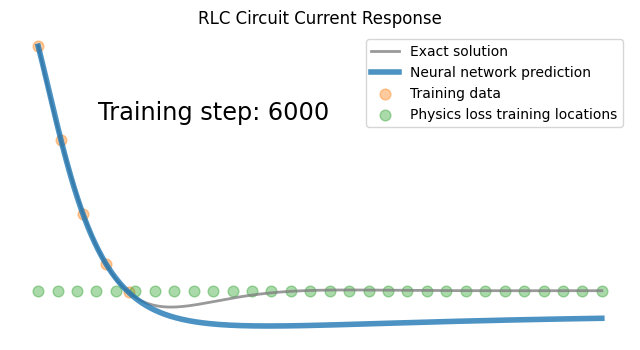

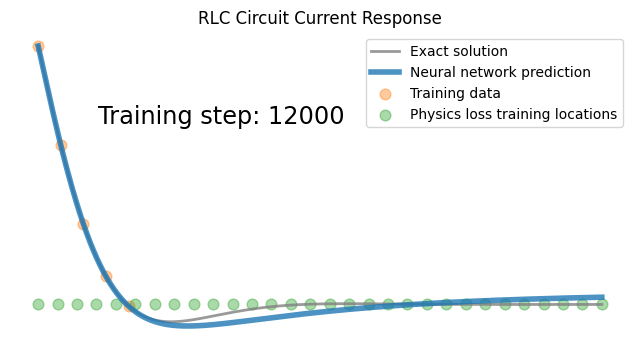

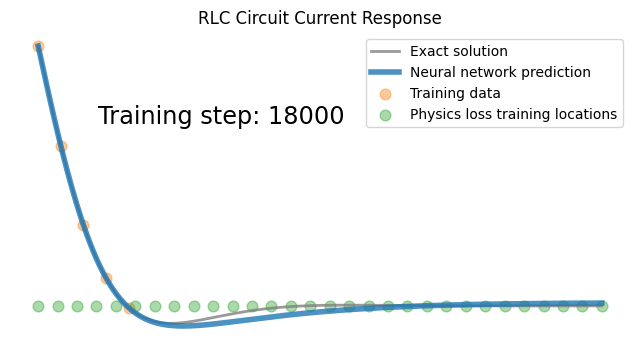

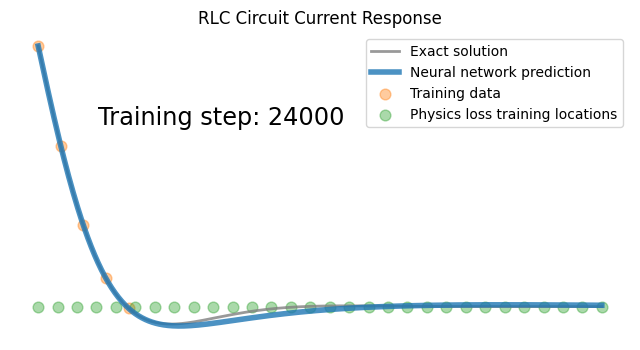

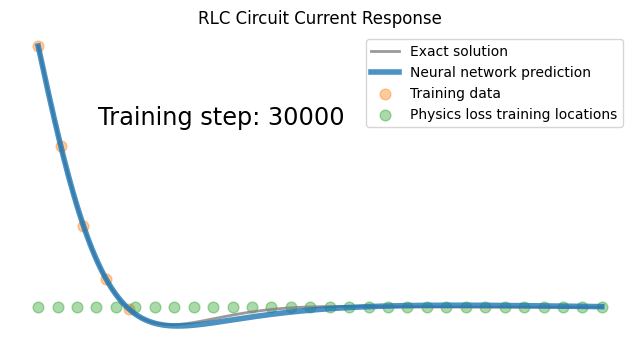

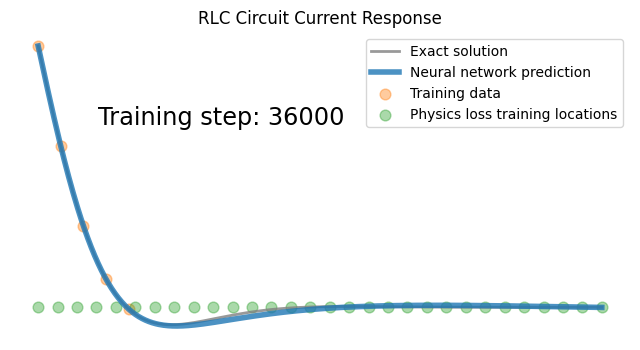

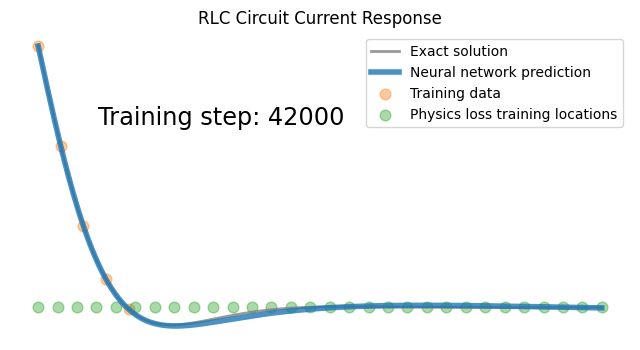

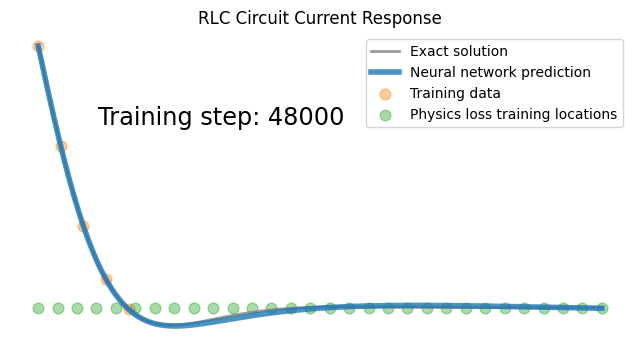

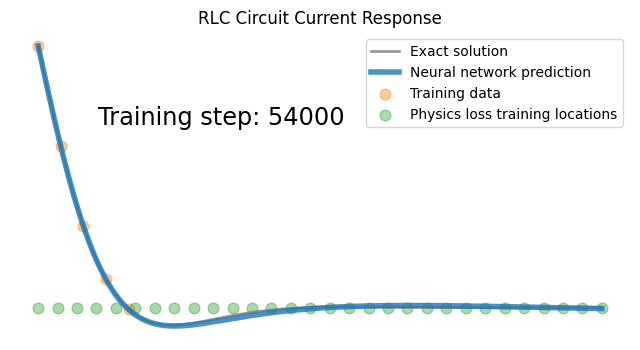

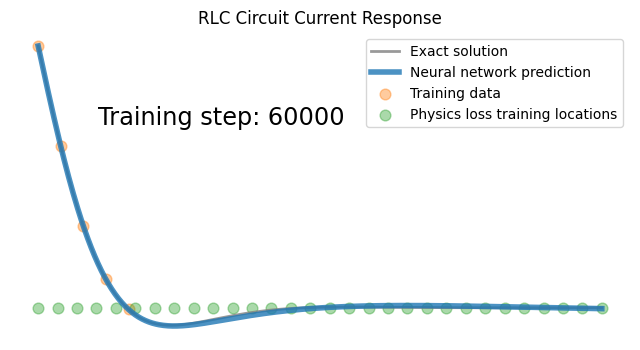

In [5]:
t_physics = torch.linspace(0, 10, 30).view(-1,1).requires_grad_(True) 

torch.manual_seed(123)
# Testing with 40
model = FCN(1, 1, 40, 3)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

for i in range(60000):
    optimizer.zero_grad()
    
    Ih = model(t_data) 
    loss1 = loss_fn(Ih, I_data)  
    
    Ihp = model(t_physics)
    dx  = torch.autograd.grad(Ihp, t_physics, torch.ones_like(Ihp), create_graph=True)[0]
    dx2 = torch.autograd.grad(dx,  t_physics, torch.ones_like(dx), create_graph=True)[0]

    physics = L * dx2 + R * dx + (1 / C) * Ihp
    loss2 = (1e-4) * torch.mean(physics**2)  
    
    loss = loss1 + loss2  
    loss.backward()
    optimizer.step()
    
    if (i + 1) % 6000 == 0:
        Ih = model(t).detach()
        tp = t_physics.detach()
        plot_result(t, I, t_data, I_data, Ih, i+1, tp)
        plt.show()

### Inference

- Only slight variation is observed on both increasing/decreasing number of hidden layers.
- Similar Generalization, Accuracy, Convergence